In [1]:
import pandas as pd

In [2]:
pip install xlrd

In [3]:
shark_attack = pd.read_excel('GSAF5.xls')

In [4]:
shark_attack.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Unnamed: 11', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [5]:
shark_attack.dtypes

Date               object
Year              float64
Type               object
Country            object
State              object
Location           object
Activity           object
Name               object
Sex                object
Age                object
Injury             object
Unnamed: 11        object
Time               object
Species            object
Source             object
pdf                object
href formula       object
href               object
Case Number        object
Case Number.1      object
original order    float64
Unnamed: 21        object
Unnamed: 22        object
dtype: object

In [6]:
shark_attack.rename(columns = {'Species ': 'Species'},inplace = True)

In [7]:
shark_table = shark_attack[['Date','Year','Type','Country', 'Activity','Age','Species']]

In [8]:
filter_2000 = shark_table['Year'] >= 2000
shark_table_2000 = shark_table.loc[filter_2000]

In [9]:
shark_table_2000['Year'].astype(int) 

0       2023
1       2023
2       2023
3       2023
4       2023
        ... 
2665    2000
2666    2000
2667    2000
2668    2000
2669    2000
Name: Year, Length: 2669, dtype: int32

In [10]:
shark_table_2000.dtypes

Date         object
Year        float64
Type         object
Country      object
Activity     object
Age          object
Species      object
dtype: object

In [11]:
def Country_Cleaning(c):
    if c in ['COLUMBIA']:
        return 'Colombia'
    elif c in ['TURKS & CAICOS']:
        return 'Turks and Caicos'
    elif c in ['ST MARTIN', 'ST. MAARTIN', 'ST. MARTIN']:
        return 'ST Martin'
    elif c in ['Mexico ']:
        return 'Mexico'
    else:
        c

In [12]:
shark_table_2000['Country'].apply(Country_Cleaning).value_counts()

Country
Turks and Caicos    5
Colombia            4
ST Martin           3
Name: count, dtype: int64

In [13]:
shark_table_2000.loc[:,'Country'] = shark_table_2000['Country'].str.title()

In [14]:
shark_table_2000

,Date,Year,Type,Country,Activity,Age,Species
0,02 Dec-2023,2023.0,Unprovoked,Mexico,Swimming,26,NaN
1,30 Nov-2023,2023.0,Unprovoked,Australia,Swimming,21,1.8m bull shark
2,21 Nov-2023,2023.0,Unprovoked,Bahamas,Scuba diving,47,NaN
3,10 Nov-2023,2023.0,Unprovoked,Australia,Free diving,32,NaN
4,05 Nov-2023,2023.0,Unprovoked,Usa,Swimming,66,NaN
...,...,...,...,...,...,...,...
2665,03-Feb-2000,2000.0,Unprovoked,New Zealand,Surfing,12,NaN
2666,01-Feb-2000,2000.0,Unprovoked,Australia,Surfing,26,3 m [10'] shark
2667,Reported 28-Jan-2000,2000.0,Watercraft,Reunion,Canoe with 3 men onboard sank,NaN,NaN
2668,05-Jan-2000,2000.0,Unprovoked,Thailand,Diving,35,NaN


In [15]:
shark_table_2000.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2669 entries, 0 to 2669
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2669 non-null   object 
 1   Year      2669 non-null   float64
 2   Type      2655 non-null   object 
 3   Country   2667 non-null   object 
 4   Activity  2545 non-null   object 
 5   Age       2001 non-null   object 
 6   Species   1687 non-null   object 
dtypes: float64(1), object(6)
memory usage: 166.8+ KB


In [16]:
import re

def clean_age(age_str):# Replace 's' from strings that match the pattern '\d\ds'
    age_str = str(age_str)
    if re.search(r'\d\ds', age_str):
        age_str = re.sub(r'(\d\d)s', r'\1', age_str)
    numbers = re.findall(r'\d+', age_str)
    return float(numbers[-1]) if numbers else age_str

In [17]:
shark_table_2000['Clean_Age'] = shark_table_2000['Age'].apply(clean_age)

C:\Users\verus\AppData\Local\Temp\ipykernel_956\4271109360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_table_2000['Clean_Age'] = shark_table_2000['Age'].apply(clean_age)


In [18]:
shark_table_2000['Clean_Age'].unique

<bound method Series.unique of 0       26.0
1       21.0
2       47.0
3       32.0
4       66.0
        ... 
2665    12.0
2666    26.0
2667     nan
2668    35.0
2669     nan
Name: Clean_Age, Length: 2669, dtype: object>

In [19]:
def age_cleaning(a):
    a = str(a)
    if 'a minor' in a.upper():
        return '10'
    elif '18 months' in a.upper():
        return '1.5'
    elif '!!' in a:
        return float('nan')
    elif 'teen' in a.upper():
        return '15'
    elif 'M' in a:
        return float('nan')
    elif 'mid-30s' in a.upper():
        return '35' 
    else:
        try:
            return float(a)
        except ValueError:
            return None

In [20]:
shark_table_2000.dropna(subset=['Clean_Age'],inplace=True) #Good

C:\Users\verus\AppData\Local\Temp\ipykernel_956\2608356348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_table_2000.dropna(subset=['Clean_Age'],inplace=True) #Good


In [21]:
shark_table_2000['Clean_Age'].isna().sum() #Good - worked to only bring the unique without nan

0

In [22]:
shark_table_2000['Clean_Age'] = shark_table_2000['Clean_Age'].apply(age_cleaning) #applied formula replacing values

C:\Users\verus\AppData\Local\Temp\ipykernel_956\3541245678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_table_2000['Clean_Age'] = shark_table_2000['Clean_Age'].apply(age_cleaning) #applied formula replacing values


In [23]:
shark_table_2000['Clean_Age'].value_counts()

Clean_Age
20.0    75
15.0    70
17.0    63
16.0    57
14.0    56
        ..
2.0      1
82.0     1
72.0     1
86.0     1
84.0     1
Name: count, Length: 78, dtype: int64

In [24]:
shark_table_2000.describe(include='all')

,Date,Year,Type,Country,Activity,Age,Species,Clean_Age
count,2669,2669.000000,2655,2667,2545,2001,1687,1981.000000
unique,2223,NaN,10,107,350,182,814,NaN
top,12-Apr-2001,NaN,Unprovoked,Usa,Surfing,15,White shark,NaN
freq,5,NaN,2094,1306,774,44,99,NaN
mean,NaN,2011.875984,NaN,NaN,NaN,NaN,NaN,30.938415
std,NaN,6.605616,NaN,NaN,NaN,NaN,NaN,16.098505
min,NaN,2000.000000,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2007.000000,NaN,NaN,NaN,NaN,NaN,18.000000
50%,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,28.000000
75%,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,42.000000


In [25]:
shark_table_2000.dropna()

,Date,Year,Type,Country,Activity,Age,Species,Clean_Age
1,30 Nov-2023,2023.0,Unprovoked,Australia,Swimming,21,1.8m bull shark,21.0
7,Reported 02 Nov-2023,2023.0,Questionable,Egypt,Scuba diving,66,Oceanic whitetip shark,66.0
8,31 Oct-2023,2023.0,Unprovoked,Australia,Surfing,55,"White Shark, 4.5 m",55.0
9,25 Oct 2023,2023.0,Unprovoked,Usa,Surfing,30,Juvenile tiger shark,30.0
12,20 Oct 2023,2023.0,Unprovoked,Belize,Snorkeling,8,"Nurse shark, 5' to 6'",8.0
...,...,...,...,...,...,...,...,...
2654,24-Mar-2000,2000.0,Unprovoked,Usa,Surfing,37,1.2 m [4'] shark,37.0
2655,15-Mar-2000,2000.0,Unprovoked,New Caledonia,Spearfishing,35,Tiger shark?,35.0
2659,Reported 03-Mar-2000,2000.0,Invalid,New Zealand,Kayaking,27,Shark involvement questionable,27.0
2661,Mar-2000,2000.0,Unprovoked,Usa,Spearfishing,39,"Shortfin mako shark, 3 m to 3.4 m [10' to 11']",39.0


In [26]:
shark_table_2000['Year'] = shark_table_2000['Year'].astype(int)

C:\Users\verus\AppData\Local\Temp\ipykernel_956\2834825214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_table_2000['Year'] = shark_table_2000['Year'].astype(int)


In [27]:
total_attacks = shark_table_2000['Country'].count()
#Likelyhood of being attacked in Australia

In [28]:
australia_attacks = shark_table_2000['Country'].value_counts().get('Australia',0)
print(australia_attacks)


526


In [29]:
hypothesis1 = int((australia_attacks/total_attacks)*100) 
print(f'Likelihood of being attaked by a shark in Auatralia is {hypothesis1} % compared to other countries')

Likelihood of being attaked by a shark in Auatralia is 19 % compared to other countries


In [30]:
sport_category = pd.read_excel('sport category.xlsx')

In [31]:
sport_category['Sport Category'].unique()

array(['Canoeing or Kayaking', 'Diving', 'Feeding', 'Jet skiing',
       'Kite Boarding', 'Not Sport Related', 'Paddle Boarding', 'Sailing',
       'Snorkeling', 'Surfing', 'Swimming', 'Unknown', 'Wade Fishing'],
      dtype=object)

In [32]:
merged_shark_table_2000 = pd.merge(shark_table_2000, sport_category, on='Activity', how='left')

In [33]:
merged_shark_table_2000

,Date,Year,Type,Country,Activity,Age,Species,Clean_Age,Sport Category
0,02 Dec-2023,2023,Unprovoked,Mexico,Swimming,26,NaN,26.0,Swimming
1,30 Nov-2023,2023,Unprovoked,Australia,Swimming,21,1.8m bull shark,21.0,Swimming
2,21 Nov-2023,2023,Unprovoked,Bahamas,Scuba diving,47,NaN,47.0,Diving
3,10 Nov-2023,2023,Unprovoked,Australia,Free diving,32,NaN,32.0,Diving
4,05 Nov-2023,2023,Unprovoked,Usa,Swimming,66,NaN,66.0,Swimming
...,...,...,...,...,...,...,...,...,...
2664,03-Feb-2000,2000,Unprovoked,New Zealand,Surfing,12,NaN,12.0,Surfing
2665,01-Feb-2000,2000,Unprovoked,Australia,Surfing,26,3 m [10'] shark,26.0,Surfing
2666,Reported 28-Jan-2000,2000,Watercraft,Reunion,Canoe with 3 men onboard sank,NaN,NaN,NaN,Canoeing or Kayaking
2667,05-Jan-2000,2000,Unprovoked,Thailand,Diving,35,NaN,35.0,Diving


In [34]:
merged_shark_table_2000

,Date,Year,Type,Country,Activity,Age,Species,Clean_Age,Sport Category
0,02 Dec-2023,2023,Unprovoked,Mexico,Swimming,26,NaN,26.0,Swimming
1,30 Nov-2023,2023,Unprovoked,Australia,Swimming,21,1.8m bull shark,21.0,Swimming
2,21 Nov-2023,2023,Unprovoked,Bahamas,Scuba diving,47,NaN,47.0,Diving
3,10 Nov-2023,2023,Unprovoked,Australia,Free diving,32,NaN,32.0,Diving
4,05 Nov-2023,2023,Unprovoked,Usa,Swimming,66,NaN,66.0,Swimming
...,...,...,...,...,...,...,...,...,...
2664,03-Feb-2000,2000,Unprovoked,New Zealand,Surfing,12,NaN,12.0,Surfing
2665,01-Feb-2000,2000,Unprovoked,Australia,Surfing,26,3 m [10'] shark,26.0,Surfing
2666,Reported 28-Jan-2000,2000,Watercraft,Reunion,Canoe with 3 men onboard sank,NaN,NaN,NaN,Canoeing or Kayaking
2667,05-Jan-2000,2000,Unprovoked,Thailand,Diving,35,NaN,35.0,Diving


In [35]:
final_multiindex = merged_shark_table_2000.set_index(['Year', 'Country'])
final_multiindex

Date        Type  \
Year Country                                         
2023 Mexico                02 Dec-2023  Unprovoked   
     Australia             30 Nov-2023  Unprovoked   
     Bahamas               21 Nov-2023  Unprovoked   
     Australia             10 Nov-2023  Unprovoked   
     Usa                   05 Nov-2023  Unprovoked   
...                                ...         ...   
2000 New Zealand           03-Feb-2000  Unprovoked   
     Australia             01-Feb-2000  Unprovoked   
     Reunion      Reported 28-Jan-2000  Watercraft   
     Thailand              05-Jan-2000  Unprovoked   
     Usa                          2000  Watercraft   

                                       Activity  Age           Species  \
Year Country                                                             
2023 Mexico                            Swimming   26               NaN   
     Australia                         Swimming   21   1.8m bull shark   
     Bahamas                       Scuba diving   47               NaN   
     Australia                      Free diving   32               NaN   
     Usa                               Swimming   66               NaN   
...                                         ...  ...               ...   
2000 New Zealand                        Surfing   12               NaN   
     Australia                          Surfing   26   3 m [10'] shark   
     Reunion      Canoe with 3 men onboard sank  NaN               NaN   
     Thailand                            Diving   35               NaN   
     Usa                     Fishing for tarpon  NaN  Hammerhead shark   

                  Clean_Age        Sport Category  
Year Country                                       
2023 Mexico            26.0              Swimming  
     Australia         21.0              Swimming  
     Bahamas           47.0                Diving  
     Australia         32.0                Diving  
     Usa               66.0              Swimming  
...                     ...                   ...  
2000 New Zealand       12.0               Surfing  
     Australia         26.0               Surfing  
     Reunion            NaN  Canoeing or Kayaking  
     Thailand          35.0                Diving  
     Usa                NaN               Feeding  

[2669 rows x 7 columns]

In [37]:
pivot_1 = pd.pivot_table(merged_shark_table_2000,index='Clean_Age',values='Year',aggfunc='count')
pivot_1 = pivot_1.sort_values(by=['Year'], ascending=False)
pivot_1

,Year
Clean_Age,
20.0,75
15.0,70
17.0,63
16.0,57
14.0,56
...,...
84.0,1
2.0,1
72.0,1


In [38]:
pivot_2 = pd.pivot_table(merged_shark_table_2000,index='Country', values='Year', aggfunc='count')
pivot_2 = pivot_2.sort_values(by=['Year'], ascending=False)
pivot_2

,Year
Country,
Usa,1306
Australia,526
South Africa,155
Bahamas,78
Brazil,66
...,...
Nigeria,1
Norway,1
Okinawa,1


In [39]:
pivot_3 = pd.pivot_table(merged_shark_table_2000,index='Sport Category',columns='Clean_Age',values='Year',aggfunc='count')
pivot_3

Clean_Age,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,...,70.0,71.0,72.0,73.0,74.0,75.0,77.0,82.0,84.0,86.0
Sport Category,,,,,,,,,,,,,,,,,,,,,
Canoeing or Kayaking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Diving,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Feeding,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,...,2.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,NaN
Jet skiing,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kite Boarding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Not Sport Related,NaN,NaN,NaN,2.0,NaN,6.0,3.0,7.0,2.0,7.0,...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Paddle Boarding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Sailing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Snorkeling,NaN,NaN,NaN,NaN,1.0,2.0,1.0,1.0,2.0,1.0,...,3.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN


In [40]:
pivot_4 = pd.pivot_table(merged_shark_table_2000,index='Sport Category',values='Year',aggfunc='count')
pivot_4 = pivot_4.sort_values(by=['Year'], ascending=False)
pivot_4

,Year
Sport Category,
Surfing,937
Swimming,435
Feeding,388
Not Sport Related,187
Diving,138
Snorkeling,112
Wade Fishing,107
Canoeing or Kayaking,62
Paddle Boarding,24


<Axes: xlabel='Sport Category', ylabel='count'>

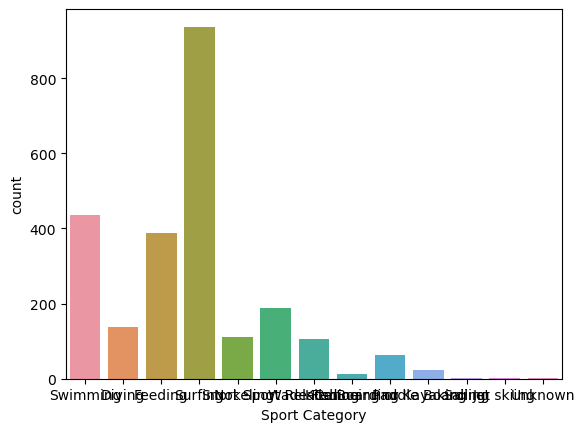

In [42]:
# Bar chart shark attack sport activity
import seaborn as sns
sns.countplot(x='Sport Category', data=merged_shark_table_2000)

In [43]:
pd.pivot_table(merged_shark_table_2000,index='Clean_Age',values='Year',aggfunc='count')

,Year
Clean_Age,
2.0,1
3.0,2
4.0,1
5.0,3
6.0,13
...,...
75.0,3
77.0,3
82.0,1


<Axes: xlabel='Clean_Age', ylabel='count'>

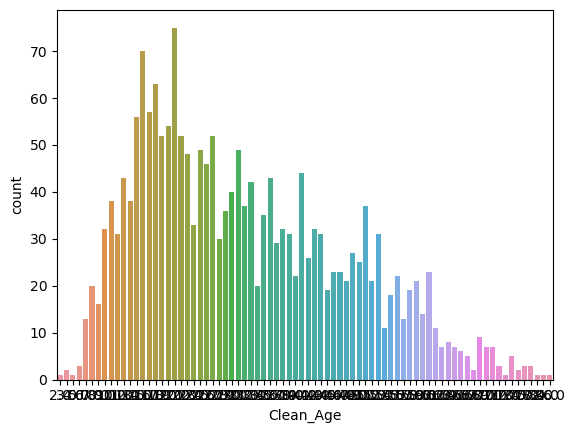

In [44]:
sns.countplot(x='Clean_Age', data=merged_shark_table_2000)

In [45]:
merged_shark_table_2000.dtypes

Date               object
Year                int32
Type               object
Country            object
Activity           object
Age                object
Species            object
Clean_Age         float64
Sport Category     object
dtype: object

In [46]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [46]:
merged_shark_table_2000.to_excel('merged_shark_table_2000.xlsx', index=False)

In [47]:
merged_shark_table_2000.describe(include='all').round()

,Date,Year,Type,Country,Activity,Age,Species,Clean_Age,Sport Category
count,2669,2669.0,2655,2667,2545,2001,1687,1981.0,2409
unique,2223,NaN,10,107,350,182,814,NaN,13
top,12-Apr-2001,NaN,Unprovoked,Usa,Surfing,15,White shark,NaN,Surfing
freq,5,NaN,2094,1306,774,44,99,NaN,937
mean,NaN,2012.0,NaN,NaN,NaN,NaN,NaN,31.0,NaN
std,NaN,7.0,NaN,NaN,NaN,NaN,NaN,16.0,NaN
min,NaN,2000.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN
25%,NaN,2007.0,NaN,NaN,NaN,NaN,NaN,18.0,NaN
50%,NaN,2012.0,NaN,NaN,NaN,NaN,NaN,28.0,NaN
75%,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,42.0,NaN


In [49]:
merged_shark_table_2000.duplicated().sum()

8

In [50]:
merged_shark_table_2000 = merged_shark_table_2000.drop_duplicates()

In [51]:
merged_shark_table_2000.duplicated().sum()

0